In [ ]:
# Checking life expectancy for countries

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
import math
import statsmodels.api as sm
from statsmodels.formula.api import ols
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.preprocessing import StandardScaler

In [2]:
df = pd.read_csv('refined_life_expect.csv')
print(df.shape)

#remove fragmanted data
df.dropna(inplace=True)

# make sure that there's still enough data to work with
print(df.shape)

(2938, 19)
(1649, 19)


In [ ]:
# check for correlations between the different variables
sns.pairplot(df, diag_kind="kde", height=2.5)
plt.savefig('pairedplots_all.png')

In [3]:
# from the paired plot using the columns we believe alcohol, bmi, hiv, gdp, 
# children malnutrition, average education, country size (small/medium/big), the ratio between adult to infant mortality,
# the interactions between bmi+alcohol (lifestyle), the interaction between population+gdp, 

new_df = pd.DataFrame({'life_expectancy': df['life_expectancy'],
                        'alcohol': df['alcohol'],
                        'bmi': df['bmi'],
                        'hiv': df['hiv'],
                        'gdp': df['gdp'],
                        'thinness_till19': df['thinness_till19'],
                        'inf_death': df['inf_death'],
                        'school': df['school'],
                        'death_ratio': df['death_ratio'],
                        'lifestyle': df['bmi']*df['alcohol'],
                        'pop_gdp': df['gdp']*df['pop_size'],
                        'pop_size': df['pop_size'],
                        })

# check for multicollinearity and remove highgly correlated variables
corr_map = new_df.corr()

In [ ]:
def create_hist(data, transform=None, title=None, xlabel=None):
    if transform == 'log':
        data = np.log(data)
    elif transform == 'sqrt':
        data = np.cbrt(data)
    elif transform == 'cube':
        data = np.cbrt(data)
    
    plt.figure(figsize=(6,3))
    plt.hist(data, density=True)
    plt.title(title)
    plt.ylabel('Frequency')
    plt.xlabel(xlabel)
    plt.show
    return

def create_scatter(x, y, title, xlabel, ylabel, file_name):
    # Using Matplotlib sublots
    fig, ax = plt.subplots(figsize=(8, 5))

    #create the scatter
    ax.scatter(x, y, color="orange", alpha=0.5)

    #adds a title and axes labels
    ax.set_title(title)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)

    #removing top and right borders
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    plt.savefig(f'{file_name}.png')
    return
        
    
# create_scatter(np.log(new_df['gdp']), new_df['life_expectancy'], 'Life Expectancy and GDP', 
#                'GDP (Log)', 'Life Expectancy (Years)', 'gdp_log_life_corr')    
    
    
# np.corrcoef(new_df['school'], new_df['life_expectancy'])

In [ ]:
def CorrMtx(df, dropDuplicates = True, xrot=70, yrot=0):

    # Your dataset is already a correlation matrix.
    # If you have a dateset where you need to include the calculation
    # of a correlation matrix, just uncomment the line below:
    # df = df.corr()

    # Exclude duplicate correlations by masking uper right values
    if dropDuplicates:    
        mask = np.zeros_like(df, dtype=np.bool)
        mask[np.triu_indices_from(mask)] = True

    # Set background color / chart style
    sns.set_style(style = 'white')
    # Set font size
    plt.rc('font', size=12)          # controls default text sizes
    plt.rc('axes', titlesize=14)     # fontsize of the axes title
    plt.rc('axes', labelsize=12)    # fontsize of the x and y labels
    plt.rc('xtick', labelsize=12)    # fontsize of the tick labels
    plt.rc('ytick', labelsize=12)    # fontsize of the tick labels
    plt.rc('legend', fontsize=8)    # legend fontsize
    plt.rc('figure', titlesize=14)  # fontsize of the figure title
    # Set up  matplotlib figure
    f, ax = plt.subplots(figsize=(14, 11))

    # Add diverging colormap from red to blue
    cmap = sns.diverging_palette(250, 10, as_cmap=True)
    # add title
    plt.title("Correlation Heat Map")
   
    

    # Draw correlation plot with or without duplicates
    if dropDuplicates:
        sns.heatmap(df, mask=mask, cmap=cmap, 
                square=True,
                linewidth=.5, cbar_kws={"shrink": .5}, ax=ax)
        plt.xticks(rotation=xrot)
        plt.yticks(rotation=yrot)
        plt.savefig('heatmap.png')
        
    else:
        sns.heatmap(df, cmap=cmap, 
                square=True,
                linewidth=.5, cbar_kws={"shrink": .5}, ax=ax)
        plt.xticks(rotation=xrot)
        plt.yticks(rotation=yrot)
        plt.savefig('heatmap.png')
    return

# CorrMtx(corr_map)

In [ ]:
# colors = ['red','blue','green','black','orange','purple','pink']
# count=0
# for region in list(zip(data['Region'].unique(),colors)):
#     plots = sns.jointplot(x='relative_country_income',
#                   y='Average Primary School Completion',
#                   data=data[data['Region']==region[0]],
#                   color=region[1], label=region[0], kind='reg',
#                   ylim=(0,140))
#     plots.fig.suptitle('Income vs Primary School Completion in '+region[0],y=1.03,fontsize=20)
#     plots.annotate(stats.pearsonr)
#     count+=1

In [ ]:
y = new_df.life_expectancy

xhiv = np.log(new_df['hiv'])
xalco = new_df['alcohol']
xbmi = new_df['bmi']
xgdp = np.log(new_df['gdp'])
xinf = np.cbrt(new_df['inf_death'])
xthin = new_df['thinness_till19']

fig, axs = plt.subplots(2, 3)
axs[0, 0].hist(xhiv)
axs[0, 0].set_title('Axis [0,0]')

axs[0, 1].hist(xbmi)
axs[0, 1].set_title('Axis [0,1]')

axs[0, 2].hist(xgdp)
axs[0, 2].set_title('Axis [0,1]')

axs[1, 0].hist(xalco)
axs[1, 0].set_title('Axis [1,0]')

axs[1, 1].hist(xinf)
axs[1, 1].set_title('Axis [1,1]')

axs[1, 2].hist(xthin)
axs[1, 2].set_title('Axis [1,2]')

for ax in axs.flat:
    ax.set(xlabel='x-label', ylabel='y-label')

# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axs.flat:
    ax.label_outer()


In [4]:
# transform our independent variable to look more normally distrubuted so model will fit better 
new_df.hiv = new_df['hiv'].apply(np.log)
new_df.pop_gdp = new_df['pop_gdp'].apply(np.log)
new_df.gdp = new_df['gdp'].apply(np.log)
new_df.inf_death =new_df['inf_death'].apply(np.cbrt)
new_df.death_ratio = new_df['death_ratio'].apply(np.sqrt)

(1649, 12)

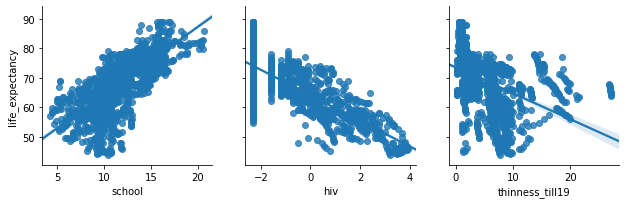

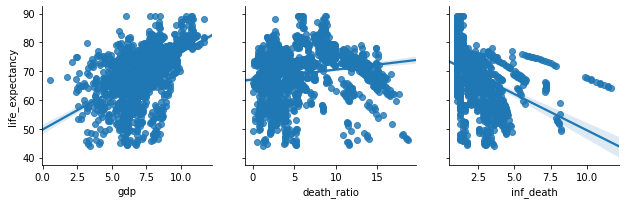

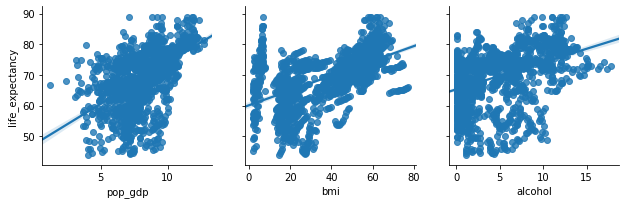

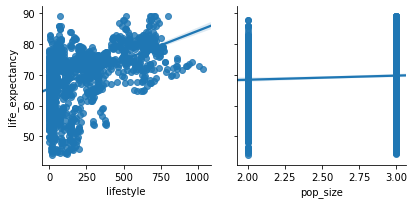

In [5]:
# before running the model we removed the outliers
depended = ['life_expectancy']
features = ['school', 'hiv', 'thinness_till19', 'gdp',
            'death_ratio', 'inf_death', 'pop_gdp', 'bmi',
            'alcohol', 'lifestyle', 'pop_size'] 

# looking at our data again to try and locate outliers
def get_pairs(data, depended, features, n, fig_name):
    row_groups = [features[i:i+n] for i in range(0, len(features), n)]
    # create the plots
    for ind in row_groups:
        plot = sns.pairplot(x_vars=ind, y_vars=depended, data=data, kind="reg", height=3)
        plt.savefig(f"{fig_name}_{ind}.png")
    # save the file    
    return

get_pairs(new_df, depended, features, 3, 'paired_before_liers')
new_df.shape

(1635, 12)

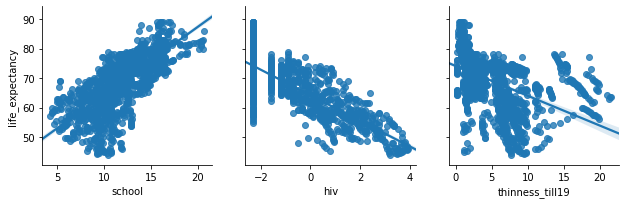

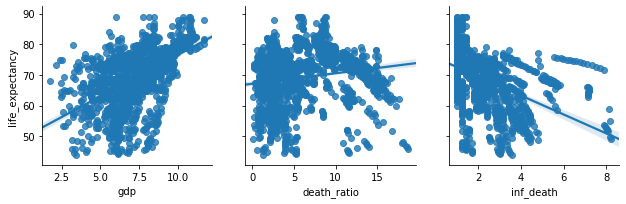

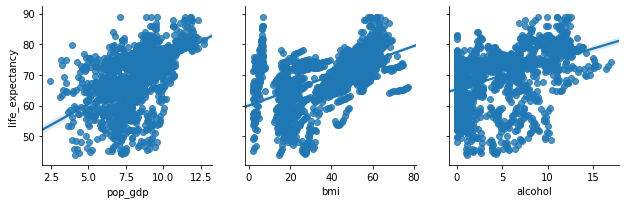

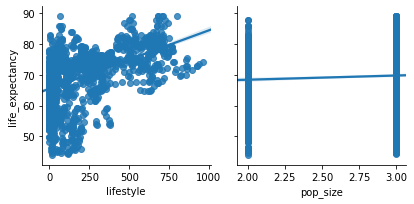

In [7]:
# remove outliers and check the amount of data that we left
new_df = new_df[new_df.gdp > 1.25] 
new_df = new_df[new_df.thinness_till19 < 25]
new_df = new_df[new_df.lifestyle < 995]

get_pairs(new_df, depended, features, 3, 'paired_after_liers')
new_df.shape

In [8]:
# first model to test our feature's significance
lr_model_init = ols(formula='life_expectancy~bmi+alcohol+hiv+gdp+thinness_till19+inf_death+C(pop_size)+school+death_ratio+lifestyle+pop_gdp', data=new_df).fit()
lr_model_init.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        life_expectancy   R-squared:                       0.804
Model:                            OLS   Adj. R-squared:                  0.803
Method:                 Least Squares   F-statistic:                     667.1
Date:                Thu, 22 Aug 2019   Prob (F-statistic):               0.00
Time:                        16:47:34   Log-Likelihood:                -4547.4
No. Observations:                1635   AIC:                             9117.
Df Residuals:                    1624   BIC:                             9176.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           44.8844      0.751     59.751      0.000      43.411      46.358
C(pop_size)[T.3]    -5.5739      0.227    -24.536      0.000      -6.019      -5.128
bmi                  0.0050      0.009      0.545      0.585      -0.013       0.023
alcohol              0.0766      0.066      1.160      0.246      -0.053       0.206
hiv                 -3.0061      0.073    -41.107      0.000      -3.150      -2.863
gdp                -14.1676      0.251    -56.385      0.000     -14.660     -13.675
thinness_till19     -0.1274      0.030     -4.217      0.000      -0.187      -0.068
inf_death           -1.0334      0.113     -9.159      0.000      -1.255      -0.812
school               0.8360      0.060     13.916      0.000       0.718       0.954
death_ratio         -0.2156      0.030     -7.132      0.000      -0.275      -0.156
lifestyle            0.0003      0.001      0.255      0.799      -0.002       0.003
pop_gdp             14.6839      0.230     63.975      0.000      14.234      15.134
==============================================================================
Omnibus:                       13.024   Durbin-Watson:                   0.446
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               18.142
Skew:                          -0.066   Prob(JB):                     0.000115
Kurtosis:                       3.499   Cond. No.                     5.96e+16
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 4.35e-26. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

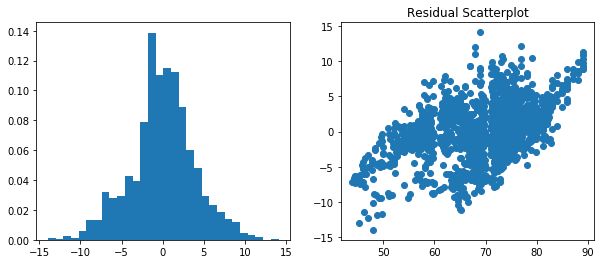

In [11]:
def checkresiduals(df, target, sm_model):
    # checking for our model - Homoscedasticity,  Independence of residuals
    pred_val = sm_model.fittedvalues.copy()
    true_val = df[target].values.copy()
    residual = true_val - pred_val

    
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))
    # fig, ax = plt.subplots(figsize=(8, 6))
    ax1.hist(residual, density=True, bins=30)
    ax2.scatter(df[target],residual)
    ax2.set_title('Residual Scatterplot')
    plt.show()
    
checkresiduals(new_df, 'life_expectancy', lr_model_init)

In [9]:
#adjusting the model - remove features that were not statistically significant (alcohol, bmi, lifestyle)
lr_model_inter = ols(formula='life_expectancy~+hiv+gdp+thinness_till19+inf_death+school+death_ratio+pop_gdp+C(pop_size)', data=new_df).fit()
lr_model_inter.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        life_expectancy   R-squared:                       0.803
Model:                            OLS   Adj. R-squared:                  0.802
Method:                 Least Squares   F-statistic:                     948.3
Date:                Thu, 22 Aug 2019   Prob (F-statistic):               0.00
Time:                        16:47:54   Log-Likelihood:                -4551.8
No. Observations:                1635   AIC:                             9120.
Df Residuals:                    1627   BIC:                             9163.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           44.3632      0.680     65.219      0.000      43.029      45.697
C(pop_size)[T.3]    -5.5171      0.225    -24.541      0.000      -5.958      -5.076
hiv                 -2.9757      0.070    -42.467      0.000      -3.113      -2.838
gdp                -13.9793      0.227    -61.459      0.000     -14.425     -13.533
thinness_till19     -0.1507      0.027     -5.509      0.000      -0.204      -0.097
inf_death           -1.0124      0.111     -9.110      0.000      -1.230      -0.794
school               0.9189      0.053     17.367      0.000       0.815       1.023
death_ratio         -0.2080      0.030     -6.920      0.000      -0.267      -0.149
pop_gdp             14.5339      0.206     70.478      0.000      14.129      14.938
==============================================================================
Omnibus:                       12.031   Durbin-Watson:                   0.446
Prob(Omnibus):                  0.002   Jarque-Bera (JB):               16.885
Skew:                          -0.044   Prob(JB):                     0.000216
Kurtosis:                       3.490   Cond. No.                     3.63e+15
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 4.36e-26. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

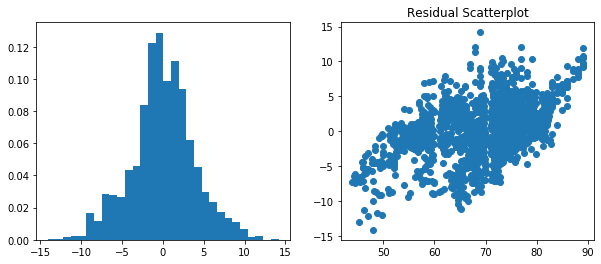

In [12]:
checkresiduals(new_df, 'life_expectancy', lr_model_inter)

In [13]:
# Scaling the data set
independent = ['school', 'hiv', 'thinness_till19',
               'death_ratio', 'inf_death', 'pop_gdp',
               'gdp', 'pop_size'] 

scaler = StandardScaler()
scaler.fit(new_df[independent])
scaled_features = scaler.transform(new_df[independent])

# create a scaled dataframe
scaled_features_df = pd.DataFrame(scaled_features, columns=independent, index=new_df.index)
scaled_features_df.head()

# running the model after removing the outliers
scaled_features_model = sm.OLS(endog=new_df['life_expectancy'], exog=sm.add_constant(scaled_features_df)).fit()
scaled_features_model.summary()

c:\users\gilor\appdata\local\programs\python\python37-32\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        life_expectancy   R-squared:                       0.803
Model:                            OLS   Adj. R-squared:                  0.802
Method:                 Least Squares   F-statistic:                     948.3
Date:                Thu, 22 Aug 2019   Prob (F-statistic):               0.00
Time:                        16:52:01   Log-Likelihood:                -4551.8
No. Observations:                1635   AIC:                             9120.
Df Residuals:                    1627   BIC:                             9163.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              69.3221      0.097    714.050      0.000      69.132      69.513
school              2.5722      0.148     17.367      0.000       2.282       2.863
hiv                -4.8501      0.114    -42.467      0.000      -5.074      -4.626
thinness_till19    -0.6389      0.116     -5.509      0.000      -0.866      -0.411
death_ratio        -0.9192      0.133     -6.920      0.000      -1.180      -0.659
inf_death          -1.3812      0.152     -9.110      0.000      -1.679      -1.084
pop_gdp             0.4903      0.061      8.037      0.000       0.371       0.610
gdp                 0.4803      0.062      7.719      0.000       0.358       0.602
pop_size            0.1249      0.098      1.276      0.202      -0.067       0.317
==============================================================================
Omnibus:                       12.031   Durbin-Watson:                   0.446
Prob(Omnibus):                  0.002   Jarque-Bera (JB):               16.885
Skew:                          -0.044   Prob(JB):                     0.000216
Kurtosis:                       3.490   Cond. No.                     3.78e+15
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is  4e-28. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

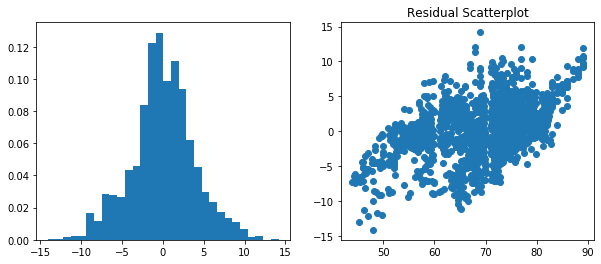

In [15]:
checkresiduals(new_df, 'life_expectancy', scaled_features_model)

mean absolete error: 3.082329962751478
mean squared error: 16.944079751915773
root squared error: 4.116318713597839


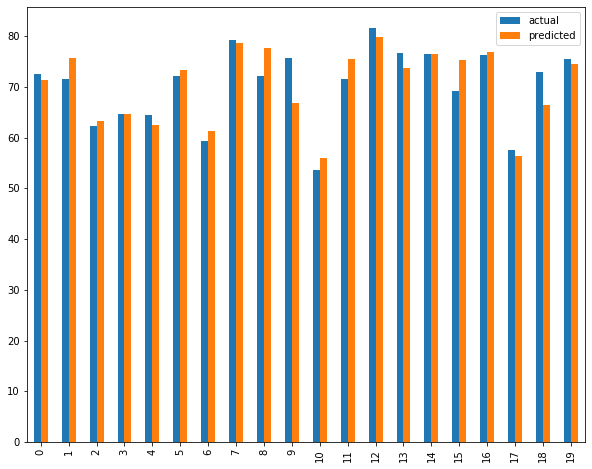

In [16]:
# removing bmi, gdp, population_size from that were deemed insignificant in our model model
X = new_df[['hiv','pop_gdp', 'death_ratio','school', 'thinness_till19', 'inf_death',]].values
y = new_df.life_expectancy.values.reshape(-1,1)

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
model = LinearRegression()
model.fit(x_train, y_train)
# print(model.intercept_)
# print(model.coef_)

y_predict = model.predict(x_test)
predict_df = pd.DataFrame({'actual': y_test.flatten(), 'predicted': y_predict.flatten()})
plot_df = predict_df.head(20)
plot_df.plot(kind='bar', figsize=(10,8))

print('mean absolete error:', metrics.mean_absolute_error(y_test, y_predict))
print('mean squared error:', metrics.mean_squared_error(y_test, y_predict))
print('root squared error:', np.sqrt(metrics.mean_squared_error(y_test, y_predict)))

mean absolete error: 3.053876023766805
mean squared error: 16.751239699146097
root squared error: 4.092827836489839


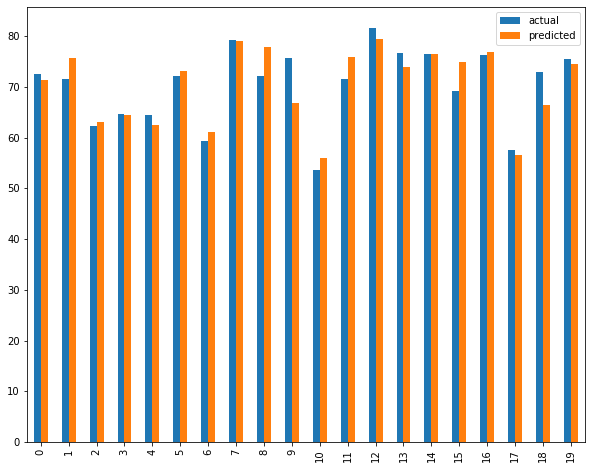

In [17]:
# adding the features that we're considered insignificant to our model to test
X = new_df[['alcohol','bmi', 'pop_size', 'hiv','pop_gdp', 'death_ratio','school', 'thinness_till19', 'inf_death',]].values
y = new_df.life_expectancy.values.reshape(-1,1)

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
model = LinearRegression()
model.fit(x_train, y_train)
# print(model.intercept_)
# print(model.coef_)

y_predict = model.predict(x_test)
predict_df = pd.DataFrame({'actual': y_test.flatten(), 'predicted': y_predict.flatten()})
plot_df = predict_df.head(20)
plot_df.plot(kind='bar', figsize=(10,8))

print('mean absolete error:', metrics.mean_absolute_error(y_test, y_predict))
print('mean squared error:', metrics.mean_squared_error(y_test, y_predict))
print('root squared error:', np.sqrt(metrics.mean_squared_error(y_test, y_predict)))